Dataset : https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [24]:
import random
from PIL import Image
from tqdm import tqdm

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split

#### **Data Loading**

In [45]:
training_data  = []
training_label = []   # 0: Cat, 1: Dog

size = (128,128)

for file in tqdm(os.listdir("dataset\\train\\cats")):
    image = Image.open(os.path.join("dataset\\train\\cats", file))
    image_rgb = image.convert('RGB')
    
    image_resized = image_rgb.resize(size)
    img = np.array(image_resized)
    
    training_data.append(img)
    training_label.append(0)

for file in tqdm(os.listdir("dataset\\train\\dogs")):
    image = Image.open(os.path.join("dataset\\train\\dogs", file))
    image_rgb = image.convert('RGB')
    
    image_resized = image_rgb.resize(size)
    img = np.array(image_resized)
    
    training_data.append(img)
    training_label.append(1)
    
testing_data  = []
testing_label = []   # 0: Cat, 1: Dog

for file in tqdm(os.listdir("dataset\\test\\cats")):
    image = Image.open(os.path.join("dataset\\test\\cats", file))
    image_rgb = image.convert('RGB')
    
    image_resized = image_rgb.resize(size)
    img = np.array(image_resized)
    
    testing_data.append(img)
    testing_label.append(0)

for file in tqdm(os.listdir("dataset\\test\\dogs")):
    image = Image.open(os.path.join("dataset\\test\\dogs", file))
    image_rgb = image.convert('RGB')
    
    image_resized = image_rgb.resize(size)
    img = np.array(image_resized)
    
    testing_data.append(img)
    testing_label.append(1)

training_data = np.array(training_data)
training_label = np.array(training_label)
testing_data = np.array(testing_data)
testing_label = np.array(testing_label)


100%|██████████| 70/70 [00:00<00:00, 111.24it/s]


In [46]:
print("training_data :",len(training_data), "training_label :",len(training_label))
print("testing_data :" ,len(testing_data),  "testing_label :", len(testing_label))

training_data : 553 training_label : 553
testing_data : 140 testing_label : 140


In [76]:
training_data = training_data / 255.0
testing_data = testing_data / 255.0

training_data.shape

(553, 128, 128, 3)

In [77]:
training_label.shape

(553,)

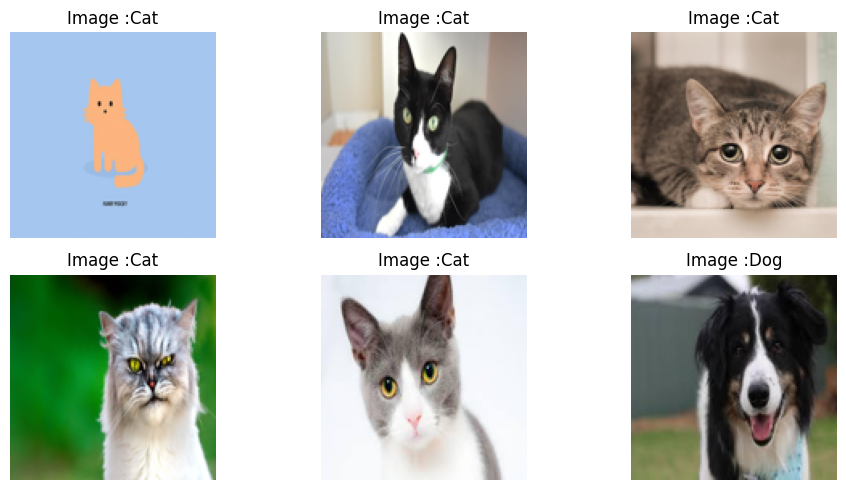

In [78]:
plt.figure(figsize=(10,5))

labels = ["Cat", "Dog"]

for i in range(6):
    plt.subplot(2,3, i+1)
    rand = random.randint(0, len(training_data)-1)
    plt.imshow(training_data[rand])
    label = labels[training_label[rand]]
    plt.title("Image :"+label)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [79]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(training_data, training_label, epochs=10, 
                    validation_data=(testing_data, testing_label))

Epoch 1/10


C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.5289 - loss: 0.7246 - val_accuracy: 0.5000 - val_loss: 0.7005
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5702 - loss: 0.6755 - val_accuracy: 0.5143 - val_loss: 0.7821
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.6250 - loss: 0.6620 - val_accuracy: 0.5714 - val_loss: 0.6959
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.6547 - loss: 0.5979 - val_accuracy: 0.5643 - val_loss: 0.7635
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.6894 - loss: 0.5603 - val_accuracy: 0.6571 - val_loss: 0.6885
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.7776 - loss: 0.4850 - val_accuracy: 0.6714 - val_loss: 0.8158
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8256 - loss: 0.4147 - val_accuracy: 0.6571 - val_loss: 0.7345
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.8319 - loss: 0.3596 - val_accuracy: 0.6429 - val_los

In [81]:
train_loss, train_acc = model.evaluate(training_data, training_label, verbose=1)

print("Train Accuracy :",train_acc)
print("Train Loss :", train_loss)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9474 - loss: 0.1573
Train Accuracy : 0.9602169990539551
Train Loss : 0.12074600905179977


In [84]:
test_loss, test_acc = model.evaluate(testing_data, testing_label, verbose=1)

print("Test Accuracy :",test_acc)
print("Test Loss :", test_loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6305 - loss: 1.0417
Test Accuracy : 0.6571428775787354
Test Loss : 1.0221054553985596


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


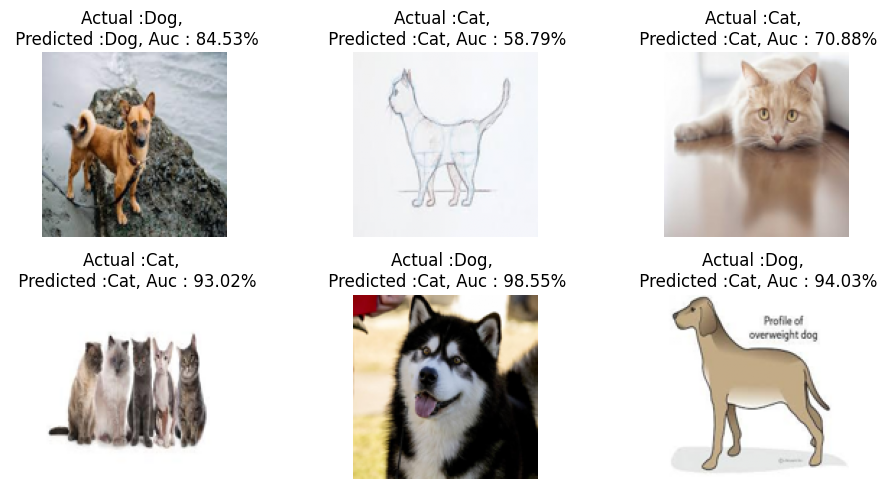

In [83]:
plt.figure(figsize=(10,5))

labels = ["Cat", "Dog"]

for i in range(6):
    plt.subplot(2,3, i+1)
    rand = random.randint(0, len(testing_data)-1)
    plt.imshow(testing_data[rand])
    
    label = labels[testing_label[rand]]
    
    p_label = model.predict(np.expand_dims(testing_data[rand], axis=0))
    predicted_label = labels[np.argmax(p_label)] 
    auc = max(p_label[0])*100
    
    plt.title(f"Actual :{label}, \n Predicted :{predicted_label}, Auc : {auc:0.2f}%")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [70]:
p_label

array([[0.9998896 , 0.26789355]], dtype=float32)

In [72]:
max(p_label[0])

0.9998896